In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set dataset directory
d_dir = '../../datasets'

In [11]:
# Read data file
input_file = f'{d_dir}/univ2_flows.csv'
flows = pd.read_csv(input_file)

In [12]:
flows.head()

,start_time,end_time,source_ip,destination_ip,protocol,source_port,destination_port,first_pkt_size,max_iat,flow_duration,packet_count,idle_timeout,flow_class
0,1264186933,1264187420,244.157.46.108,244.157.82.156,17,7001,7000,86,193,487,121,11,3
1,1264186933,1264187420,244.157.82.156,244.157.46.108,17,7000,7001,108,193,487,111,11,3
2,1264186933,1264187486,244.157.193.38,244.157.82.13,17,7001,7000,86,309,553,38220,11,3
3,1264186933,1264187486,244.157.82.13,244.157.193.38,17,7000,7001,190,309,553,25112,11,3
4,1264186933,1264187614,244.157.48.193,244.157.82.167,17,7001,7000,86,115,681,423,11,3


In [13]:
flows.describe()

,start_time,end_time,protocol,source_port,destination_port,first_pkt_size,max_iat,flow_duration,packet_count,idle_timeout,flow_class
count,2.890200e+04,2.890200e+04,28902.000000,28902.000000,28902.000000,28902.000000,28902.000000,28902.000000,28902.000000,28902.000000,28902.000000
mean,1.264187e+09,1.264187e+09,16.529583,16511.608712,15678.044634,168.433776,112.964951,198.492942,241.363677,5.424019,1.927514
std,1.854579e+02,2.201507e+02,2.225639,18241.511315,17790.512946,202.712940,140.364611,245.463877,8591.426549,5.305212,0.831775
min,1.264187e+09,1.264187e+09,6.000000,17.000000,21.000000,60.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.264187e+09,1.264187e+09,17.000000,7000.000000,7000.000000,78.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.264187e+09,1.264187e+09,17.000000,7001.000000,7001.000000,107.000000,0.000000,0.000000,5.000000,1.000000,2.000000
75%,1.264187e+09,1.264188e+09,17.000000,23860.000000,14357.000000,190.000000,250.000000,417.000000,17.000000,11.000000,3.000000
max,1.264188e+09,1.264188e+09,17.000000,65532.000000,65532.000000,1514.000000,657.000000,702.000000,978622.000000,11.000000,3.000000


In [14]:
flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28902 entries, 0 to 28901
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   start_time        28902 non-null  int64 
 1   end_time          28902 non-null  int64 
 2   source_ip         28902 non-null  object
 3   destination_ip    28902 non-null  object
 4   protocol          28902 non-null  int64 
 5   source_port       28902 non-null  int64 
 6   destination_port  28902 non-null  int64 
 7   first_pkt_size    28902 non-null  int64 
 8   max_iat           28902 non-null  int64 
 9   flow_duration     28902 non-null  int64 
 10  packet_count      28902 non-null  int64 
 11  idle_timeout      28902 non-null  int64 
 12  flow_class        28902 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 2.9+ MB


In [15]:
# Features
unique_src_ips = len(flows['source_ip'].unique())
unique_dst_ips = len(flows['destination_ip'].unique())

unique_src_ports = len(flows['source_port'].unique())
unique_dst_ports = len(flows['destination_port'].unique())

unique_protocols = len(flows['protocol'].unique())

print(f'Unique Source IPs: {unique_src_ips}, Unique Destination IPs: {unique_dst_ips}')
print(f'Unique Source Ports: {unique_src_ports}, Unique Destination Ports: {unique_dst_ports}')
print(f'Unique Protocols: {unique_protocols}')

Unique Source IPs: 1647, Unique Destination IPs: 1586
Unique Source Ports: 7508, Unique Destination Ports: 7059
Unique Protocols: 2


In [16]:
flows['idle_timeout'].value_counts()

idle_timeout
11    13646
0      9547
1      5451
2        72
6        59
3        32
4        30
8        16
9        15
5        14
7        13
10        7
Name: count, dtype: int64

In [17]:
flows['flow_class'].value_counts()

flow_class
1    11121
3     9026
2     8755
Name: count, dtype: int64

In [18]:
flows['flow_class'].value_counts()/flows.shape[0]*100

flow_class
1    38.478306
3    31.229673
2    30.292021
Name: count, dtype: float64

In [19]:
flows['idle_timeout'].value_counts()/flows.shape[0]*100

idle_timeout
11    47.214726
0     33.032316
1     18.860286
2      0.249118
6      0.204138
3      0.110719
4      0.103799
8      0.055359
9      0.051900
5      0.048440
7      0.044980
10     0.024220
Name: count, dtype: float64

In [20]:
flows = flows.drop('source_ip', axis=1)
flows = flows.drop('destination_ip', axis=1)

<BarContainer object of 28902 artists>

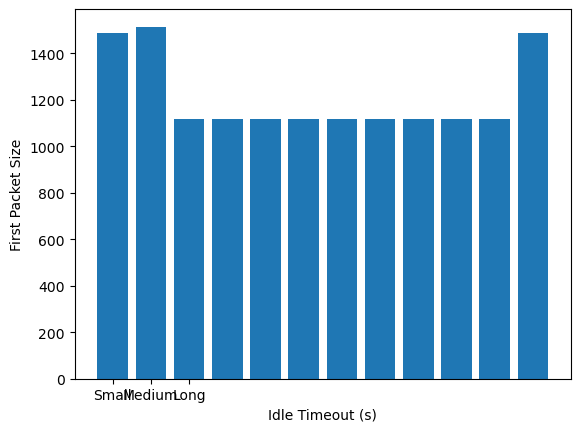

In [21]:
idle_timeout = flows['idle_timeout']
pkt_size = flows['first_pkt_size']

fg, ax = plt.subplots()
ax.set_xlabel('Idle Timeout (s)')
ax.set_ylabel('First Packet Size')
ax.set_xticks([0, 1, 2], ['Small', 'Medium', 'Long'])

ax.bar(idle_timeout, pkt_size)

In [22]:
flows['flow_class']

0        3
1        3
2        3
3        3
4        3
        ..
28897    1
28898    2
28899    2
28900    2
28901    2
Name: flow_class, Length: 28902, dtype: int64

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

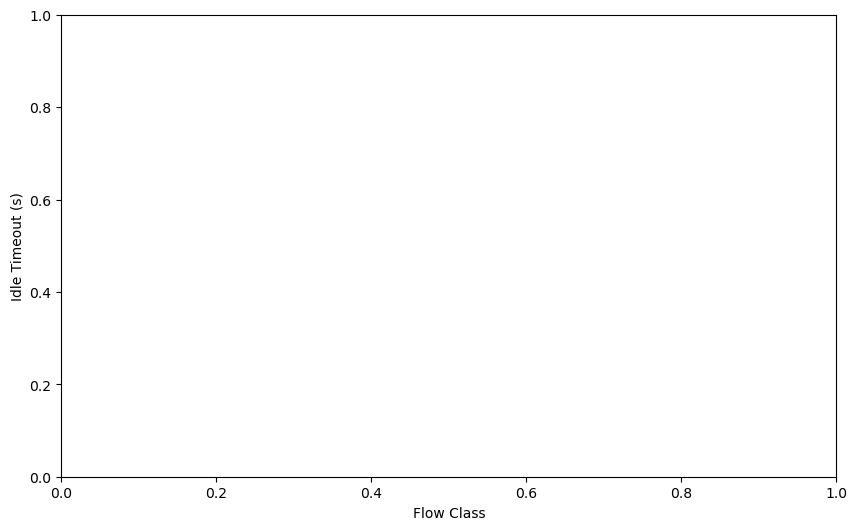

In [12]:
flow_class = flows['flow_class']
idle_timeout = flows['idle_timeout']

fg, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel('Idle Timeout (s)')
ax.set_xlabel('Flow Class')
# ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
# ax.set_yticks([0, 1, 2], ['Small', 'Medium', 'Long'])

ax.plot(idle_timeout, flow_class)
plt.show()

In [23]:
# Finding relation between columns (correlation between columns)
data_corr = flows.corr()
print(data_corr)

                  start_time  end_time  protocol  source_port  \
start_time          1.000000  0.276870 -0.131656     0.149668   
end_time            0.276870  1.000000  0.078551    -0.344995   
protocol           -0.131656  0.078551  1.000000    -0.177379   
source_port         0.149668 -0.344995 -0.177379     1.000000   
destination_port    0.124335 -0.333852 -0.194553    -0.082388   
first_pkt_size      0.096173 -0.036782  0.037106     0.019854   
max_iat            -0.416163  0.572400  0.168875    -0.417890   
flow_duration      -0.507223  0.687690  0.169922    -0.422498   
packet_count       -0.027546  0.033942  0.005852    -0.014487   
idle_timeout       -0.389583  0.618880  0.192379    -0.487130   
flow_class         -0.322822  0.604135  0.113574    -0.428127   

                  destination_port  first_pkt_size   max_iat  flow_duration  \
start_time                0.124335        0.096173 -0.416163      -0.507223   
end_time                 -0.333852       -0.036782  0.572400 

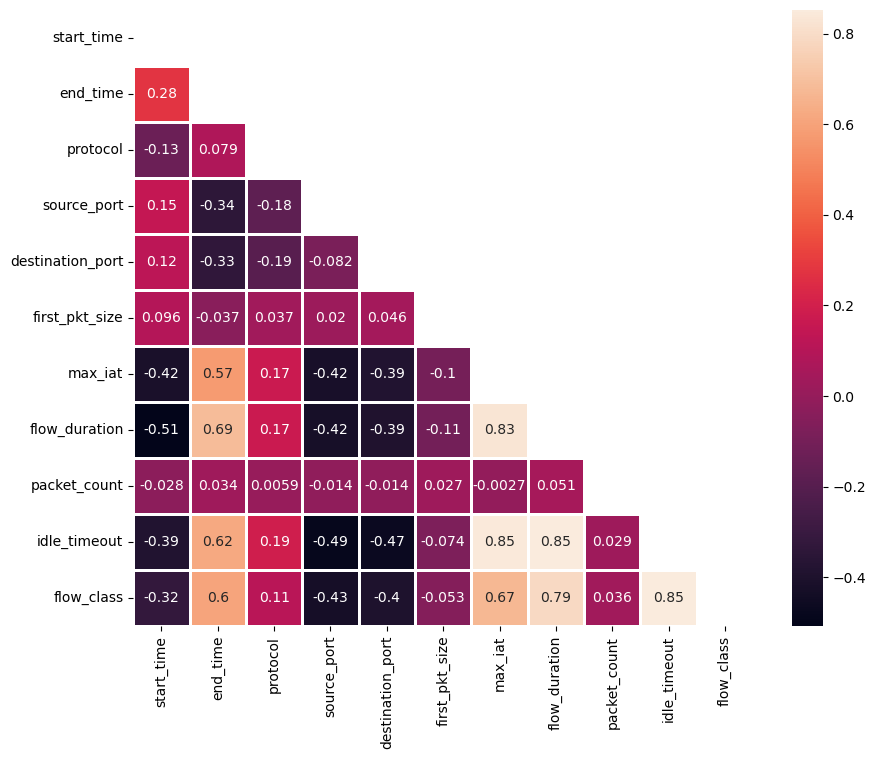

In [24]:
plt.figure(figsize=(10, 8))
matrix = np.triu(data_corr)
sns.heatmap(data_corr, annot = True, linewidth = 0.8, mask = matrix, cmap = 'rocket')
plt.show()

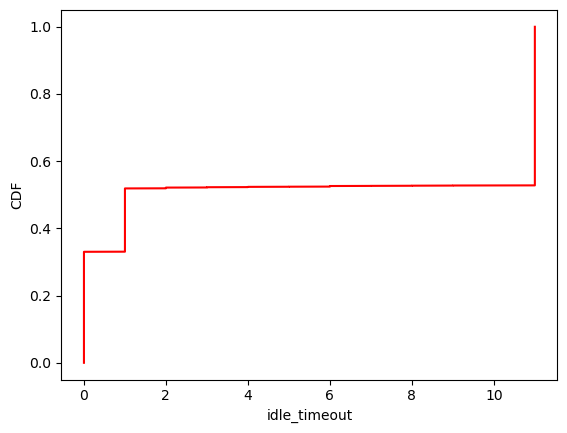

In [25]:
x_column = 'idle_timeout'
y_column = 'CDF'

fg, ax = plt.subplots()
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

# ax.set_ylim([0.4, 1])
# ax.set_xlim([0, 60])

x = sorted(flows[x_column])
records_count = len(x)
y = np.arange(records_count) / float(records_count)

ax.plot(x, y, marker = '', color='r')